[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/oscar-ramos/robotica-autonoma-python/blob/main/3-Intro-Vision/3-2-Procesamiento-Basico.ipynb)

In [1]:
from matplotlib import pyplot as plt
import cv2

Si se usa colab se puede utilizar las imágenes del repositorio, de lo contrario se pueden cargar manualmente.

In [2]:
colab = True
if (colab):
    !wget -q https://github.com/oscar-ramos/robotica-autonoma-python/raw/main/3-Intro-Vision/imagenes/gato1.jpg
    !wget -q https://github.com/oscar-ramos/robotica-autonoma-python/raw/main/3-Intro-Vision/imagenes/edificio.jpg
    !wget -q https://github.com/oscar-ramos/robotica-autonoma-python/raw/main/3-Intro-Vision/imagenes/bw.png
    !wget -q https://github.com/oscar-ramos/robotica-autonoma-python/raw/main/3-Intro-Vision/imagenes/gatos.jpg
    !wget -q https://github.com/oscar-ramos/robotica-autonoma-python/raw/main/3-Intro-Vision/imagenes/dark.jpg

# 1.&nbsp;Histograma

In [3]:
# Lectura de una imagen (el 0 al final indica que se lee como escala de gris)
Igray = cv2.imread('edificio.jpg', 0)

## 1.1. Histograma usando cv2

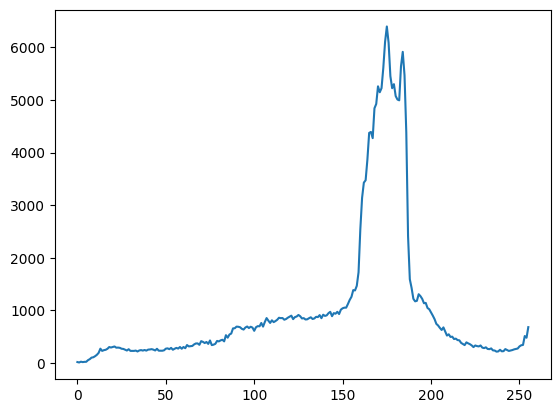

In [4]:
# Crear histograma: (I, canal 0, mask=None, tamaño, rango)
hist = cv2.calcHist([Igray], [0], None, [256], [0,256])

# Mostrar histograma
plt.plot(hist)
plt.show()

## 1.2. Histograma usando NumPy

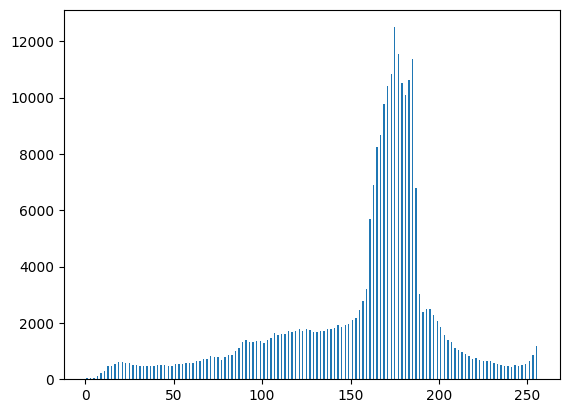

In [5]:
import numpy as np

# Crear histograma con 128 barras en el rango 0 a 256
hist = np.histogram(Igray, bins=128, range=(0, 256))
# Bordes de las barras
bin_edges = hist[1]
# Centro de la barra: promedio entre los bordes
bin_centers = (bin_edges[1:]  + bin_edges[0:len(bin_edges)-1])/2
# Gráfico del histograma (rhist[0] contiene las frecuencias)
plt.bar(bin_centers, hist[0]);
plt.show()

## 1.3. Histograma de color

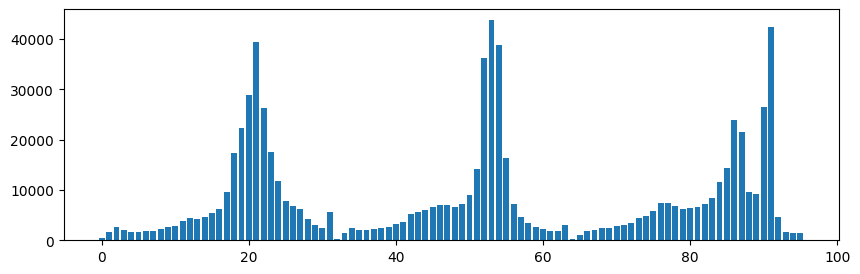

In [6]:
# Leer imagen de color
I = cv2.imread('edificio.jpg')

# Histograma de cada canal RGB
bhist = np.histogram(I[:,:,0], bins=32, range=(0, 256))
ghist = np.histogram(I[:,:,1], bins=32, range=(0, 256))
rhist = np.histogram(I[:,:,2], bins=32, range=(0, 256))
# Concatenación de histogramas ("features")
hist = np.concatenate((rhist[0], ghist[0], bhist[0])).astype(np.float64)
# Vector del tamaño de hist
n = np.arange(len(hist))

# Gráfico de los 3 histogramas concatenados ("features")
plt.figure(figsize=(10,3))
plt.bar(n, hist)
plt.show()

## 1.4. Ecualización de histograma

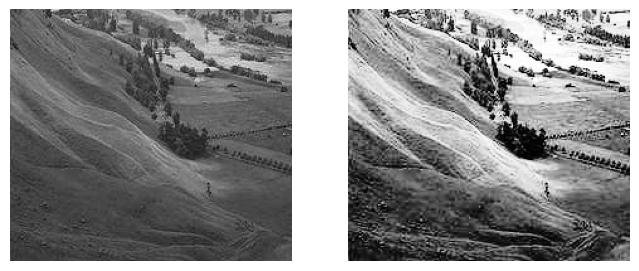

In [7]:
ecualizacion = True
if (ecualizacion):
    I = cv2.imread('dark.jpg',0)
    Iequaliz = cv2.equalizeHist(I)
    # Mostrar el resultado
    plt.figure(figsize=(8,4))
    plt.subplot(1,2,1); plt.imshow(I, cmap='gray'); plt.axis('off');
    plt.subplot(1,2,2); plt.imshow(Iequaliz, cmap='gray'); plt.axis('off');

# 2.&nbsp;Thresholding

In [8]:
# Cargar la imagen en modo gris
Igray = cv2.imread('edificio.jpg', 0)


 Con valor de umbralización 100: 


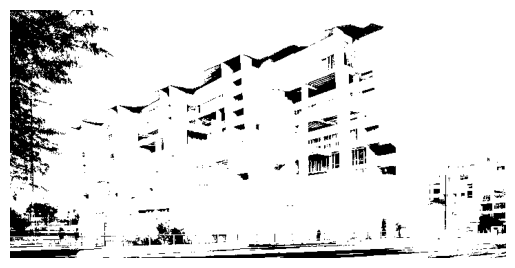


 Con valor de umbralización 150: 


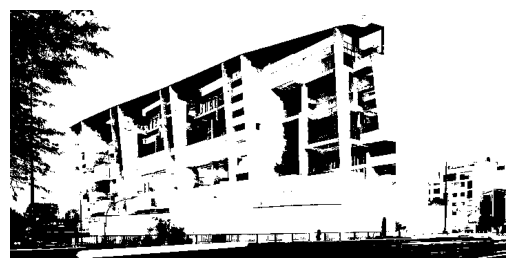


 Con valor de umbralización 200: 


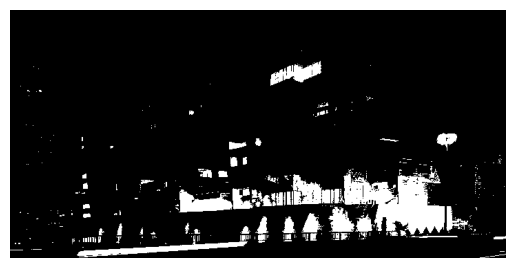

In [9]:
# Valores para umbralizar
ths = [100, 150, 200]

# Threshold (umbralización)
for th in ths:
    print("\n Con valor de umbralización {}: ".format(th))
    retval, Ibw = cv2.threshold(Igray, th, 255, cv2.THRESH_BINARY)
    plt.imshow(Ibw, cmap='gray')
    plt.axis('off'); plt.show()

# 3.&nbsp;Operaciones Morfológicas

In [10]:
# Leer la imagen como escala de grises
I = cv2.imread('bw.png', 0)

In [11]:
# Elemento estructurante
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5,5))
# También se puede definir un elemento estructurante como un array
kernel2 = np.ones((5,5), np.uint8)

# Operaciones Morfológicas
Ierosion    = cv2.erode(I, kernel, iterations=1)
Idilatacion = cv2.dilate(I, kernel, iterations=1)
Iapertura   = cv2.morphologyEx(I, cv2.MORPH_OPEN, kernel)
Icierre     = cv2.morphologyEx(I, cv2.MORPH_CLOSE, kernel)

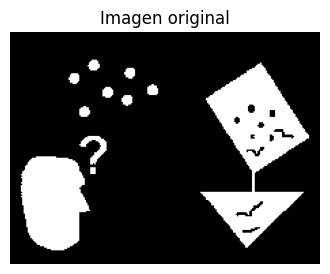

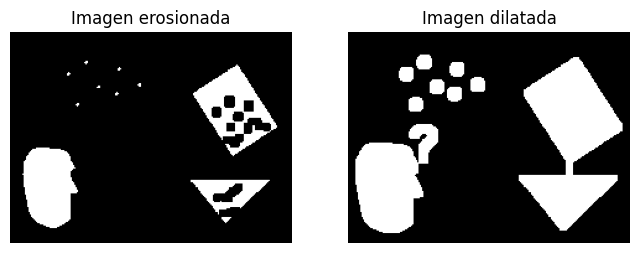

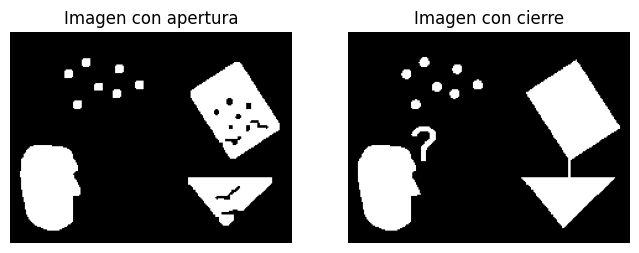

In [12]:
# Mostrar la imagen original
plt.figure(figsize=(4,4))
plt.imshow(I, cmap='gray'); plt.axis('off'); plt.title("Imagen original")
plt.show()

# Mostrar las imágenes resultantes
plt.figure(figsize=(8,4))
plt.subplot(1,2,1); plt.imshow(Ierosion, cmap='gray'); plt.axis('off');
plt.title("Imagen erosionada")
plt.subplot(1,2,2); plt.imshow(Idilatacion, cmap='gray'); plt.axis('off');
plt.title("Imagen dilatada")

plt.figure(figsize=(8,4))
plt.subplot(1,2,1); plt.imshow(Iapertura, cmap='gray'); plt.axis('off');
plt.title("Imagen con apertura")
plt.subplot(1,2,2); plt.imshow(Icierre, cmap='gray'); plt.axis('off');
plt.title("Imagen con cierre")
plt.show()

In [13]:
# Otros elementos estructurantes
k2 = cv2.getStructuringElement(cv2.MORPH_RECT, (5,5))     # Rectangular
k3 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5,5))  # Elíptico
k4 = cv2.getStructuringElement(cv2.MORPH_CROSS, (5,5))    # Forma de cruz

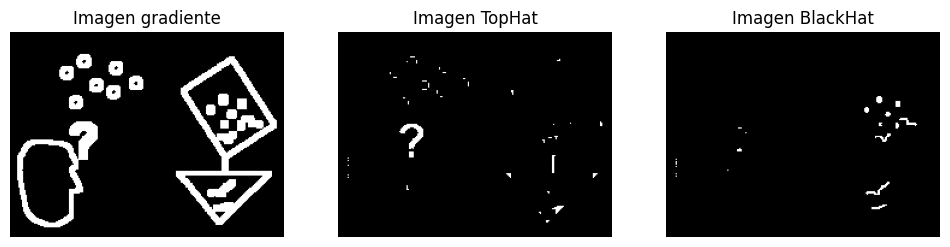

In [14]:
# Algunas otras operaciones morfológicas
otro = True
if (otro):
    # Diferencia entre la dilatación y la erosión (gradiente)
    Igrad = cv2.morphologyEx(I, cv2.MORPH_GRADIENT, kernel)
    # Diferencia entre una imagen y su apertura (tophat)
    Itophat = cv2.morphologyEx(I, cv2.MORPH_TOPHAT, kernel)
    # Diferencia entre el el cierre y la imagen de entrada (blackhat)
    Iblackhat = cv2.morphologyEx(I, cv2.MORPH_BLACKHAT, kernel)

    # Mostrar las imágenes resultantes
    plt.figure(figsize=(12,4))
    plt.subplot(1,3,1); plt.imshow(Igrad, cmap='gray'); plt.axis('off');
    plt.title("Imagen gradiente")
    plt.subplot(1,3,2); plt.imshow(Itophat, cmap='gray'); plt.axis('off');
    plt.title("Imagen TopHat")
    plt.subplot(1,3,3); plt.imshow(Iblackhat, cmap='gray'); plt.axis('off');
    plt.title("Imagen BlackHat")

# 4.&nbsp;Transformaciones espaciales

In [15]:
# Leer una imagen
I = cv2.imread('gato1.jpg')
# Tamaño de la imagen
nrows, ncols, nch = I.shape

## 4.1. Escalamiento de la imagen

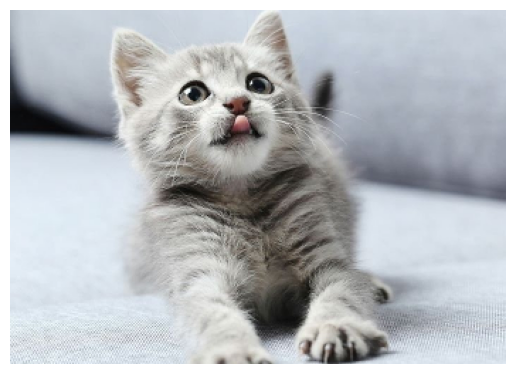

In [16]:
# Interpolaciones: cv2.INTER_AREA, cv2.INTER_CUBIC, cv2.INTER_LINEAR (default)
Iescalada = cv2.resize(I, None, fx=0.5, fy=0.5, interpolation=cv2.INTER_CUBIC)

# También se puede escalar de la siguiente manera (solo con enteros):
# height, width = I.shape[:2]
# result = cv2.resize(I, (2*width, 2*height), interpolation=cv2.INTER_CUBIC)

plt.imshow(cv2.cvtColor(Iescalada, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

## 4.2. Traslación de la imagen

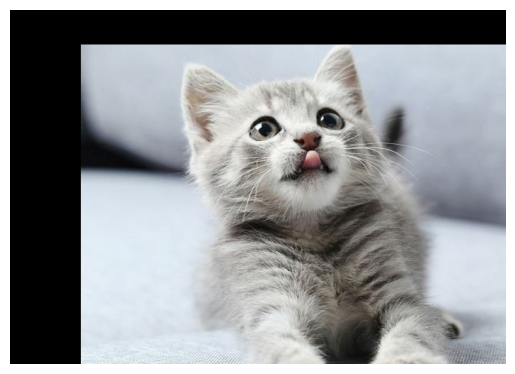

In [17]:
# Se puede escoger la matriz M = [1 0 tx
#                                 0 1 ty]
# Traslación
tx = 100; ty = 50
M = np.float32([[1, 0, tx], [0, 1, ty]])
Itrasl = cv2.warpAffine(I, M, (ncols,nrows))

# Mostrar el resultado
plt.imshow(cv2.cvtColor(Itrasl, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

## 4.3. Rotación de la imagen

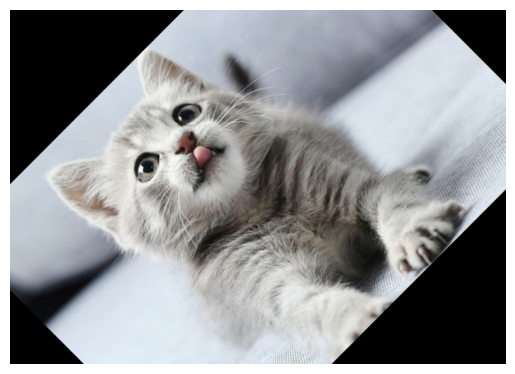

In [18]:
# Centro de la rotación y ángulo de rotación (en grados)
centro = (ncols/2, nrows/2)
angulo = 45
M = cv2.getRotationMatrix2D(centro, angulo, 1)
Irot = cv2.warpAffine(I, M, (ncols, nrows))

plt.imshow(cv2.cvtColor(Irot, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

In [19]:
# Rotación continua (funciona en local)
# =================
rotcontinua = False
if(rotcontinua):
    ang = 0
    for i in range(360):
        M = cv2.getRotationMatrix2D((ncols/2, nrows/2), ang, 1)
        Irot = cv2.warpAffine(I, M, (ncols, nrows))
        cv2.imshow('Imagen rotada', Irot)
        cv2.waitKey(2)
        ang += 1
    cv2.destroyAllWindows()

## 4.4. Shearing

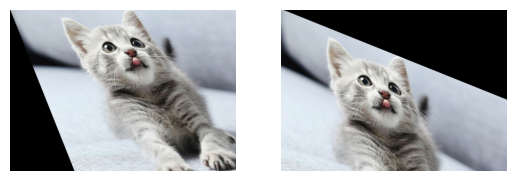

In [20]:
# Se puede usar los respectivos componentes en la matriz M
sx = 0.4
sy = 0.4
M_sx = np.array([[1.0,  sx, 0.],
                 [0.0, 1.0, 0.]])
M_sy = np.array([[1.0, 0.0, 0.],
                 [ sy, 1.0, 0.]])
# Aplicar 2 shearings
Ishear_x = cv2.warpAffine(I, M_sx, (ncols,nrows))
Ishear_y = cv2.warpAffine(I, M_sy, (ncols,nrows))

# Mostrar las imágenes resultantes
plt.subplot(1,2,1)
plt.imshow(cv2.cvtColor(Ishear_x, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(cv2.cvtColor(Ishear_y, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

# Nota: si se desea encontrar M que representa la transformación afín entre
# puntos, utilizar: M = cv2.getAffineTransform(pts1,pts2), donde cada fila de
# pts contiene un punto (es un arreglo de numpy)

## 4.5. Perspectiva

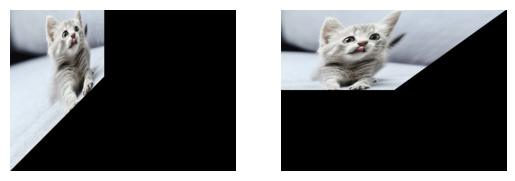

In [21]:
# Perspectiva
# ============
p1 = 0.002
p2 = 0.002
M1 = np.array([[1.0, 0.0, 0.0],
               [0.0, 1.0, 0.0],
               [ p1, 0.0, 1.0]])
M2 = np.array([[1.0, 0.0, 0.0],
               [0.0, 1.0, 0.0],
               [0.0,  p2, 1.0]])
# Aplicar las perspectivas
Ipersp1 = cv2.warpPerspective(I, M1, (ncols,nrows))
Ipersp2 = cv2.warpPerspective(I, M2, (ncols,nrows))

# Mostrar las imágenes resultantes
plt.subplot(1,2,1)
plt.imshow(cv2.cvtColor(Ipersp1, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(cv2.cvtColor(Ipersp2, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

# 5. Color

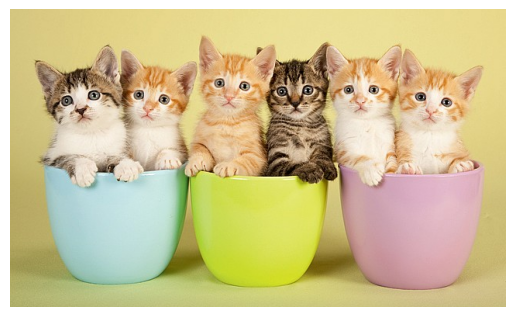

In [22]:
# Leer la imagen
I = cv2.imread("gatos.jpg")

plt.imshow(cv2.cvtColor(I, cv2.COLOR_BGR2RGB))
plt.axis('off'); plt.show()

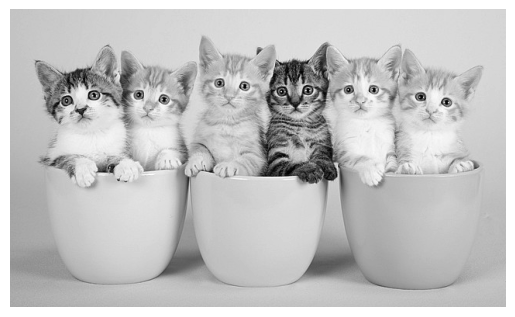

In [23]:
# Convertir a escala de grises
Igray = cv2.cvtColor(I, cv2.COLOR_BGR2GRAY)

plt.imshow(Igray, cmap='gray')
plt.axis('off'); plt.show()

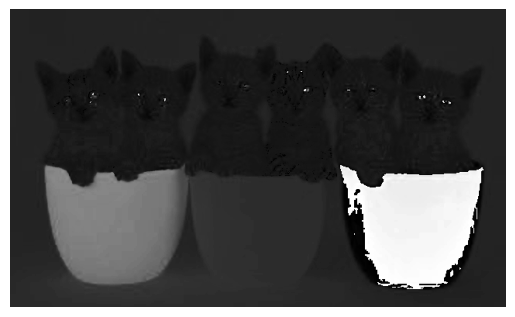

In [24]:
# Convertir BGR a HSV
Ihsv = cv2.cvtColor(I, cv2.COLOR_BGR2HSV)

# Mostrar el componente H de HSV
plt.imshow(Ihsv[:,:,0], cmap='gray')
plt.axis('off'); plt.show()
# Nota, los rangos son
#  Hue: [0, 179], Saturation/Value: [0, 255]

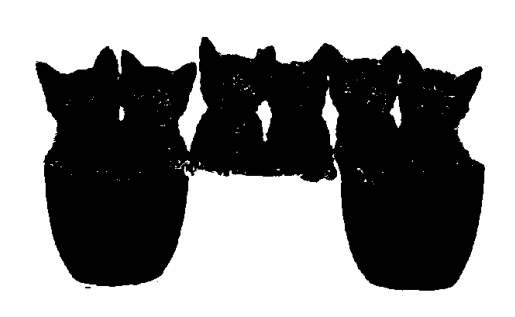

In [25]:
import numpy as np

# Definir el rango de de amarillo que se quedará en la imagen
lower_yellow = np.array([20,50,50])
upper_yellow = np.array([40,255,255])

# Generar una máscara para los valores que satisfacen el rango de color
Imask = cv2.inRange(Ihsv, lower_yellow, upper_yellow)

plt.imshow(Imask, cmap='gray')
plt.axis('off'); plt.show()

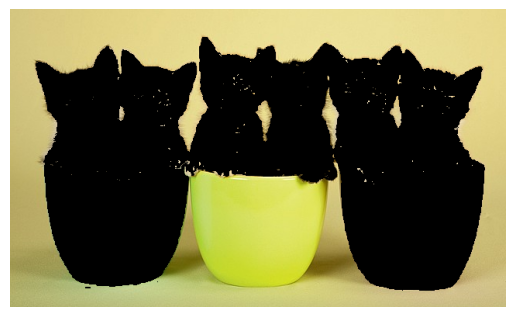

In [26]:
# Aplicar la máscara a la imagen original (mantener los puntos dentro del rango
# de color establecido)
Ifiltcolor = cv2.bitwise_and(I, I, mask=Imask)

plt.imshow(cv2.cvtColor(Ifiltcolor, cv2.COLOR_BGR2RGB))
plt.axis('off'); plt.show()